# Aula 05 - Regressão Linear Múltipla pt1

A regressão linear múltipla é uma técnica estatística utilizada para entender a relação entre uma variável dependente (a variável que queremos prever) e duas ou mais variáveis independentes (variáveis que usamos para fazer a previsão).

Em outras palavras, ela estende o conceito de regressão linear simples, onde há apenas uma variável independente, para o caso em que há múltiplas variáveis independentes.

Por exemplo, imagine que você queira prever o preço de uma casa. Você pode usar como variáveis independentes o tamanho da casa, o número de quartos, a proximidade de transportes públicos, etc. A regressão linear múltipla ajuda a entender como cada uma dessas variáveis influencia o preço da casa e a construir um modelo para prever esse preço com base nessas variáveis.

Nesta aula o professor criou um arquivo chamado `preprocessing.py` que contém o código abaixo. Apenas para preparar o material.

In [1]:
import numpy as np
import pandas as pd

def loadDataset(filename):
    baseDeDados = pd.read_csv(filename, delimiter=';')
    X = baseDeDados.iloc[:,:-1].values
    y = baseDeDados.iloc[:,-1].values
    return X, y

def fillMissingData(X, inicioColuna, fimColuna):
    from sklearn.impute import SimpleImputer
    imputer = SimpleImputer(missing_values=np.nan, strategy='median')
    X[:,inicioColuna:fimColuna + 1] = imputer.fit_transform(X[:,inicioColuna:fimColuna + 1])
    return X

# só funciona se i = 0 ou i = ultima coluna
def computeCategorization(X, i):
    
    from sklearn.preprocessing import LabelEncoder
    labelencoder_X = LabelEncoder()
    X[:, i] = labelencoder_X.fit_transform(X[:, i])

    #one hot encoding
    D = pd.get_dummies(X[:,i]).values #Cria dummies para os valores únicos encontrados na coluna i da matriz X
    if(i == 0):
        X = X[:,1:]
        X = np.insert(X, 0, D, axis=1)
        #removendo dummy variable trap
        X = X[:,1:]
    else:
        X = X[:,:i]
        for j in range(0, D.shape[1]): #Para cada coluna da matriz D vai inserindo uma a uma ao final de X.
            X = np.insert(X, i, D[:,j], axis=1)
        #removendo dummy variable trap
        X = X[:,:-1]
    return X

def splitTrainTestSets(X, y, testSize):
    from sklearn.model_selection import train_test_split
    XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size = testSize)
    return XTrain, XTest, yTrain, yTest

def computeScaling(train, test):
    from sklearn.preprocessing import StandardScaler
    scaleX = StandardScaler()
    train = scaleX.fit_transform(train)
    test = scaleX.fit_transform(test)
    return train, test

Obs: Na aula, como o processor está executando o Python localmente, ele salva esse arquivo `preprocessing.py` e chama os métodos em outros arquivos quando necessário.

Ele utiliza essas funções criadas em dois outros arquivos. Um que cria funções de regressão linear e outro de regressão multilinear.

No arquivo abaixo ele também irá usar o módulo `time` para medir o tempo das operações.

In [2]:
#temporizador
import time

def computeLinearRegressionModel(XTrain, yTrain, XTest, yTest):
    from sklearn.linear_model import LinearRegression
    regressor = LinearRegression()
    regressor.fit(XTrain, yTrain)
    yPred = regressor.predict(XTest)

    #gerar grafico
    import matplotlib.pyplot as plt
    plt.scatter(XTest[:,-1], yTest, color="red")
    plt.plot(XTest[:,-1], yPred, color="blue")
    plt.title("Inscritos x Visualizações (SVBR)")
    plt.xlabel("Total de Inscritos")
    plt.ylabel("Total de Visualizações")
    plt.show()

def runLinearRegressionExample(filename):
    start_time = time.time()
    X, y = loadDataset(filename)
    elapsed_time = time.time() - start_time
    print("Load Dataset: %.2f" % elapsed_time, "segundos.")

    start_time = time.time()
    X = fillMissingData(X, 1, 2) #Precisa começar neste caso porque sabemos que a coluna 0 é nominal
    elapsed_time = time.time() - start_time
    print("Fill Missing Data: %.2f" % elapsed_time, "segundos.")

    start_time = time.time()
    X = computeCategorization(X, 0)
    elapsed_time = time.time() - start_time
    print("Compute Categorization: %.2f" % elapsed_time, "segundos.")

    start_time = time.time()
    XTrain, XTest, yTrain, yTest = splitTrainTestSets(X, y, 0.8)
    elapsed_time = time.time() - start_time
    print("Split Train Test sets: %.2f" % elapsed_time, "segundos.")

    start_time = time.time()
    computeLinearRegressionModel(XTrain, yTrain, XTest, yTest)
    elapsed_time = time.time() - start_time
    print("Compute Linear Regression: %.2f" % elapsed_time, "segundos.")

Uma vez definidas as funções, para gerar a regressão linear basta chamar a função e com o arquivo desejado.

In [3]:
pd.read_csv("svbr.csv", delimiter=';').head()

,Canal,Inscritos,Visualizações
0,Site Arqueologia Egípcia,13438.0,406590
1,Terra Negra,35241.0,868235
2,Frank Jaava,31680.0,2856508
3,Dispersciência,25100.0,150000
4,Olá Ciência,32788.0,1575456


Load Dataset: 0.00 segundos.
Fill Missing Data: 0.65 segundos.
Compute Categorization: 0.00 segundos.
Split Train Test sets: 0.00 segundos.


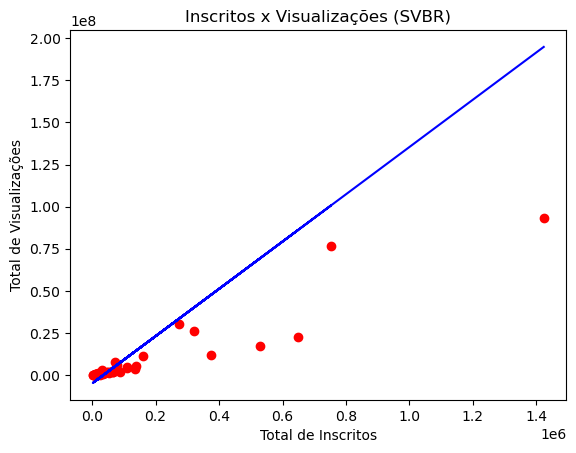

Compute Linear Regression: 0.45 segundos.


In [4]:
runLinearRegressionExample("svbr.csv")

Até o momento repetimos as mesmas coisas da aula 4 (com algumas alterações) de Regressão Linear Simples. Agora vamos realizar algumas modificações para realizar a Regressão Linear Múltipla.

A princípio ela parece bem similar. Vou destacar com comentários (#) os pontos que mudaram.

In [5]:
pd.read_csv("insurance.csv", delimiter=';').head()

,age,bmi,children,region,charges
0,19,27.900,0,southwest,16884.92400
1,18,33.770,1,southeast,1725.55230
2,28,33.000,3,southeast,4449.46200
3,33,22.705,0,northwest,21984.47061
4,32,28.880,0,northwest,3866.85520


In [6]:
#temporizador
import time

def computeMultipleLinearRegressionModel(XTrain, yTrain, XTest, yTest):
    from sklearn.linear_model import LinearRegression
    regressor = LinearRegression()
    regressor.fit(XTrain, yTrain)
    yPred = regressor.predict(XTest)
    
    #gerar grafico
    import matplotlib.pyplot as plt
    plt.scatter(yPred, yTest, color="blue")
    plt.title("Valor da Cobrança Predito X Real")
    plt.xlabel("Valor Predito")
    plt.ylabel("Valor Real")
    plt.show()
    
def runMultipleLinearRegressionExample(filename):
    start_time = time.time()
    X, y = loadDataset(filename)
    elapsed_time = time.time() - start_time
    print("Load Dataset: %.2f" % elapsed_time, "segundos.")

    start_time = time.time()
    X = fillMissingData(X, 0, 2) #Aqui, adaptamos pois a coluna categórica é a final de X (ao invés da inicial)
    elapsed_time = time.time() - start_time
    print("Fill Missing Data: %.2f" % elapsed_time, "segundos.")

    start_time = time.time()
    X = computeCategorization(X, 3) #Aqui também vai pegar especificamente a coluna categórica. Também imputamos na mão.
    elapsed_time = time.time() - start_time
    print("Compute Categorization: %.2f" % elapsed_time, "segundos.")

    start_time = time.time()
    XTrain, XTest, yTrain, yTest = splitTrainTestSets(X, y, 0.8)
    elapsed_time = time.time() - start_time
    print("Split Train Test sets: %.2f" % elapsed_time, "segundos.")

    start_time = time.time()
    computeMultipleLinearRegressionModel(XTrain, yTrain, XTest, yTest)
    elapsed_time = time.time() - start_time
    print("Compute Multiple Linear Regression: %.2f" % elapsed_time, "segundos.")    

Agora chamando a função.

In [7]:
pd.read_csv("insurance.csv", delimiter=';').head()

,age,bmi,children,region,charges
0,19,27.900,0,southwest,16884.92400
1,18,33.770,1,southeast,1725.55230
2,28,33.000,3,southeast,4449.46200
3,33,22.705,0,northwest,21984.47061
4,32,28.880,0,northwest,3866.85520


Load Dataset: 0.00 segundos.
Fill Missing Data: 0.00 segundos.
Compute Categorization: 0.00 segundos.
Split Train Test sets: 0.00 segundos.


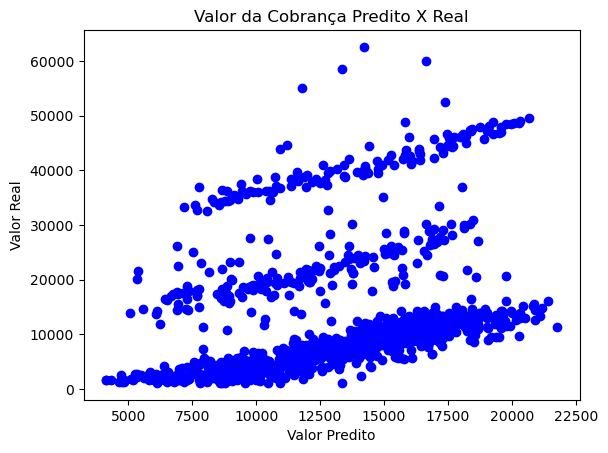

Compute Multiple Linear Regression: 0.08 segundos.


In [8]:
runMultipleLinearRegressionExample("insurance.csv")

Vemos que uma regressão linear nem sempre (na verdade, raramente) é um modelo ideal para se usar no mundo real. Tendo que os valores preditos estão bem diferentes dos valores reais na base teste. Se olharmos cada ponto podemos ver que o eixo horizontal (yPred) e o vertical (yTest) raramente estão no meio valor.